<a href="https://colab.research.google.com/github/Dani-Arizmendi/AA_PRACTICA2_GRUPO_3/blob/main/Pr%C3%A1ctica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos Keras y las librerías necesarias

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

print(tf.__version__)#

2.7.0


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

#Cargamos el set de datos y lo analizamos

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)


#test_images1 = test_images.astype('float32') / 255

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255


print (train_images.shape)
print (train_labels.shape)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000,)


#Apartado 1, 2, 3, 4 y 5

## Modelo 1

In [ ]:
modelo1 = Sequential()
modelo1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
modelo1.add(MaxPooling2D((2, 2)))

modelo1.add(Conv2D(64, (5, 5), activation='relu'))
modelo1.add(MaxPooling2D((2, 2)))

modelo1.add(Flatten())
modelo1.add(Dense(10, activation='softmax'))
modelo1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

MODELO 1 INTERPRETACIÓN DEL SUMMARY()

> 


La primera capa es de tipo convolucional con un tensor 2D. Devuelve 32 matrices o filtros  de 24x24 que son 32 capas ocultas obteniendo 832 parámetros.
El pooling que está a continuación hace una simplificación de la información obtenida y crea una versión condensada de la misma
Hacemos max pooling a todas las capas, y como habíamos puesto que la ventana del pooling sea 2x2 reducimos el tamaño de las matrices a la mitad, obteniendo unas 12x12.
 Como después del pooling las matrices son 12x12 haciendo ventanas de 5x5 obtenemos matrices de 8x8 que son el resultado de aplicar la segunda capa convolucional, que en este caso tenía 64 filtros, es decir 64  capas ocultas, que dan lugar a 51264 filtros. Volvemos a aplicar el max pooling a esta segunda capa conv y con el mismo planteamiento que antes obtenemos  64 matrices 4x4.
Aplicamos la capa Flatten a la que le entra una matriz de 3 dimensiones (24,24,64) y lo que hace es reducirla a una sola dimensión de 1024 elementos.
Por último aplicamos una capa Dense a la que le metemos todos los datos de la flatten y una función de activación Softmax. El número de parámetros de esta capa es de 10250  (10x1024 +10)  con una salida de un vector de 10.


In [ ]:
modelo1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
modelo1.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

Epoch 1/5
600/600 [==============================] - 50s 83ms/step - loss: 0.9351 - accuracy: 0.7608
Epoch 2/5
600/600 [==============================] - 50s 83ms/step - loss: 0.2668 - accuracy: 0.9210
Epoch 3/5
600/600 [==============================] - 50s 83ms/step - loss: 0.1920 - accuracy: 0.9433
Epoch 4/5
600/600 [==============================] - 50s 83ms/step - loss: 0.1543 - accuracy: 0.9545
Epoch 5/5
600/600 [==============================] - 50s 83ms/step - loss: 0.1304 - accuracy: 0.9608


In [ ]:
test_loss, test_acc = modelo1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.1089 - accuracy: 0.9698
Test accuracy: 0.9697999954223633


Durante el entrenamiento obtenemos una precisión del 96,08% mientras que en el test es de 96,98%


## Modelo 1 con 25 épocas

In [ ]:
modelo1b = Sequential()
modelo1b.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
modelo1b.add(MaxPooling2D((2, 2)))

modelo1b.add(Conv2D(64, (5, 5), activation='relu'))
modelo1b.add(MaxPooling2D((2, 2)))

modelo1b.add(Flatten())
modelo1b.add(Dense(10, activation='softmax'))
modelo1b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
modelo1b.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
modelo1b.fit(train_images, train_labels,
          batch_size=100,
          epochs=25,
          verbose=1)

Epoch 1/25
600/600 [==============================] - 51s 84ms/step - loss: 0.9101 - accuracy: 0.7649
Epoch 2/25
600/600 [==============================] - 50s 84ms/step - loss: 0.2567 - accuracy: 0.9251
Epoch 3/25
600/600 [==============================] - 50s 83ms/step - loss: 0.1861 - accuracy: 0.9456
Epoch 4/25
600/600 [==============================] - 51s 85ms/step - loss: 0.1493 - accuracy: 0.9562
Epoch 5/25
600/600 [==============================] - 51s 85ms/step - loss: 0.1272 - accuracy: 0.9636
Epoch 6/25
600/600 [==============================] - 51s 85ms/step - loss: 0.1113 - accuracy: 0.9679
Epoch 7/25
600/600 [==============================] - 51s 85ms/step - loss: 0.1002 - accuracy: 0.9706
Epoch 8/25
600/600 [==============================] - 51s 85ms/step - loss: 0.0916 - accuracy: 0.9732
Epoch 9/25
600/600 [==============================] - 51s 85ms/step - loss: 0.0850 - accuracy: 0.9748
Epoch 10/25
600/600 [==============================] - 51s 85ms/step - loss: 0.079

In [ ]:
test_loss, test_acc = modelo1b.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0428 - accuracy: 0.9863
Test accuracy: 0.986299991607666


Durante el entrenamiento obtenemos una precisión del 98,69% mientras que en el test es de 98,63%


AUMENTAR LOS ENTRENAMIENTOS

Con 5 entrenos obtenemos una precisión de 0.968, un valor muy alto para las pocas épocas que realizamos.
Como es de esperar, al aumentar las épocas aumenta la precisión a 0,986


## Modelo 1 con función tanh

In [ ]:
modelo1c = Sequential()
modelo1c.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
modelo1c.add(MaxPooling2D((2, 2)))

modelo1c.add(Conv2D(64, (5, 5), activation='tanh'))
modelo1c.add(MaxPooling2D((2, 2)))

modelo1c.add(Flatten())
modelo1c.add(Dense(10, activation='softmax'))
modelo1c.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
modelo1c.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
modelo1c.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

Epoch 1/5
600/600 [==============================] - 53s 87ms/step - loss: 0.9085 - accuracy: 0.7962
Epoch 2/5
600/600 [==============================] - 53s 88ms/step - loss: 0.3358 - accuracy: 0.9061
Epoch 3/5
600/600 [==============================] - 53s 89ms/step - loss: 0.2601 - accuracy: 0.9270
Epoch 4/5
600/600 [==============================] - 53s 89ms/step - loss: 0.2167 - accuracy: 0.9389
Epoch 5/5
600/600 [==============================] - 54s 89ms/step - loss: 0.1864 - accuracy: 0.9480


In [ ]:
test_loss, test_acc = modelo1c.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.1607 - accuracy: 0.9534
Test accuracy: 0.9534000158309937


Durante el entrenamiento obtenemos una precisión del 94,8% mientras que en el test es de 95,34%


Si cambiamos el modelo 1 y le ponemos la funcion de activacion tanh en vez de ReLu a las capas convolucionales, con 5 épocas obtenemos una precisión de entrenamiento del 0.953, que es ligeramente inferior a la obtenida con ReLu con 5 entrenamientos.



## Modelo 2


In [ ]:
modelo2 = Sequential()
modelo2.add(Conv2D(64, (7, 7), padding = "same", activation='relu', input_shape=(28, 28, 1)))
modelo2.add(MaxPooling2D((2, 2)))

modelo2.add(Conv2D(128, (3, 3), padding = "same", activation='relu'))
modelo2.add(MaxPooling2D((2, 2)))

modelo2.add(Flatten())
modelo2.add(Dense(65, activation='relu'))
modelo2.add(Dense(10, activation='softmax'))
modelo2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 65)               

MODELO 2 INTERPRETACIÓN DEL SUMMARY()

La primera capa es de tipo convolucional con un tensor 2D.En teoría, tomaría ventanas 7x7 por lo que devolvería matrices de tamaño 22x22 (28-7+1). Sin embargo, al haber puesto ’padding’=same la salida devuelve  64 matrices o filtros de 28x28 que son 64 capas ocultas obteniendo 3200 parámetros, ya que esta función mete ceros en los extremos para compensar las posiciones restantes.
El pooling que está a continuación hace una simplificación de la información obtenida y crea una versión condensada de la misma.
Hacemos max pooling a todas las capas, y como habíamos puesto que la ventana del pooling sea 2x2 reducimos el tamaño de las matrices a la mitad, obteniendo unas 14x14.
Volvemos a aplicar la segunda capa convolucional y por el mismo motivo que antes mantenemos el tamaño de las matrices, pero en este caso saca 128 filtros/ capas ocultas.
Después de cada capa convolucional debemos aplicar el pooling, que al tener ventanas 2x2 reduce el tamaño de las matrices a 7x7 y mantiene el número de filtros.
Aplicamos la capa Flatten a la que le entra una matriz de 3 dimensiones y la reduce a una sola dimensión con 6272 elementos.
El siguiente paso es aplicar una capa Dense a la que le metemos todos los datos de la flatten, una función de activación Relu, y 65 elementos, lo que hace un total de  407745 parámetros ( 6272x65+65)
Por último aplicamos una segunda capa dense en este caso con Función de activación softmax y 10 elementos y obtenemos una salida de 660 parámetros (65x10+10)


In [ ]:
modelo2.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
modelo2.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

Epoch 1/5
600/600 [==============================] - 172s 286ms/step - loss: 0.9860 - accuracy: 0.7211
Epoch 2/5
600/600 [==============================] - 171s 286ms/step - loss: 0.2869 - accuracy: 0.9138
Epoch 3/5
600/600 [==============================] - 171s 285ms/step - loss: 0.2002 - accuracy: 0.9410
Epoch 4/5
600/600 [==============================] - 171s 285ms/step - loss: 0.1520 - accuracy: 0.9552
Epoch 5/5
600/600 [==============================] - 171s 286ms/step - loss: 0.1226 - accuracy: 0.9642


In [ ]:
test_loss, test_acc = modelo2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 9s 27ms/step - loss: 0.0969 - accuracy: 0.9726
Test accuracy: 0.972599983215332


Durante el entrenamiento obtenemos una precisión del 96,42% mientras que en el test es de 97,26%


## Modelo 3


In [ ]:
modelo3 = Sequential()
modelo3.add(Conv2D(64, (7, 7), padding = "same", activation='relu', input_shape=(28, 28, 1)))
modelo3.add(MaxPooling2D((2, 2)))

modelo3.add(Conv2D(128, (3, 3), padding = "same", activation='relu'))
modelo3.add(MaxPooling2D((2, 2)))

modelo3.add(Flatten())
modelo3.add(Dense(65, activation='relu'))
modelo3.add(Dense(10, activation='softmax'))
modelo3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_5 (Dense)             (None, 65)               

MODELO 3 INTERPRETACIÓN DEL SUMMARY()

La primera capa es de tipo convolucional. En teoría, tomaría ventanas 7x7 por lo que devolvería matrices de tamaño 22x22 (28-7+1). Sin embargo, al haber puesto ’padding’=same la salida devuelve  64 matrices o filtros de 28x28 que son 64 capas ocultas obteniendo 3200 parámetros, ya que esta función mete ceros en los extremos para compensar las posiciones restantes.
El pooling que está a continuación hace una simplificación de la información obtenida y crea una versión condensada de la misma.
Hacemos max pooling a todas las capas, y como habíamos puesto que la ventana del pooling sea 2x2 reducimos el tamaño de las matrices a la mitad, obteniendo unas 14x14.
Volvemos a aplicar una capa convolucional y como por el padding no reduce el tamaño sacamos 128 filtros de 14x14 y 73856  parámetros. Vovemos a aplicar el pooling y obtenemos los mismos filtros pero de dimensión 7x7 por lo explicado anteriormente.
Aplicamos la capa Flatten a la que le entra una matriz de 3 dImensiones y la reduce a una sola dimensión con 6272 elementos.
Después aplicamos la primera capa dense a la que le metemos todos los datos de la flatten, una función de activación Relu, y 65 elementos, lo que hace un total de  407745 parámetros ( 6272x65+65)
Por último aplicamos una segunda capa dense en este caso con Función de activación softmax y 10 elementos y obtenemos una salida de 660 parámetros (65x10+10)


In [ ]:
modelo3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
modelo3.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

Epoch 1/5
600/600 [==============================] - 171s 284ms/step - loss: 0.1546 - accuracy: 0.9528
Epoch 2/5
600/600 [==============================] - 170s 283ms/step - loss: 0.0449 - accuracy: 0.9866
Epoch 3/5
600/600 [==============================] - 170s 283ms/step - loss: 0.0322 - accuracy: 0.9900
Epoch 4/5
600/600 [==============================] - 169s 282ms/step - loss: 0.0242 - accuracy: 0.9923
Epoch 5/5
600/600 [==============================] - 169s 282ms/step - loss: 0.0188 - accuracy: 0.9943


In [ ]:
test_loss, test_acc = modelo3.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 9s 27ms/step - loss: 0.0227 - accuracy: 0.9922
Test accuracy: 0.9922000169754028


Durante el entrenamiento obtenemos una precisión del 99,43% mientras que en el test es de 99,22%


# Apartado 6   

 Primero comprobamos a que corresponde la 6º imagen de test




In [ ]:
tipo_de_prenda = test_labels[5]
class_names[tipo_de_prenda]


'Trouser'

Ahora usamos cada modelo para que nos muestre su predicción




### Modelo 1


In [ ]:

predicciones1 = modelo1.predict(test_images)
prediccion_prenda = np.argmax(predicciones1[5])
class_names[prediccion_prenda]




'Trouser'

#### Conclusiones Modelo 1
Como podemos observar el modelo predice que la sexta prenda es de tipo 'Trouser' . Este resultado tiene sentido puesto que el modelo 1 tiene una precisión del 96,17%

### Modelo 2

In [ ]:
predicciones2 = modelo2.predict(test_images)
prediccion_prenda = np.argmax(predicciones2[5])
class_names[prediccion_prenda]


'Trouser'

#### Conclusiones Modelo 2
El modelo predice que la sexta imagen pertenece al tipo 'Trouser'. Este resultado tiene sentido ya que nuestro modelo tiene una precisión del 96,42%

### Modelo 3

In [ ]:
predicciones3 = modelo3.predict(test_images)
prediccion_prenda = np.argmax(predicciones3[5])
class_names[prediccion_prenda]


'Trouser'

#### Conclusiones Modelo 3
Como podemos observar el modelo predice que la sexta prenda es de tipo 'Pantalones' y se ajusta a la realidad, debido a la precisión del modelo que llega al 99,43%

#Apartado 7. Graficar modelos

##Modelo 1

In [ ]:
def plot_image(i, predicciones1, true_label, img):
  predicciones1, true_label, img = predicciones1, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicciones1)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predicciones1),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predicciones1, true_label):
  predicciones1, true_label = predicciones1, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicciones1, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicciones1)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

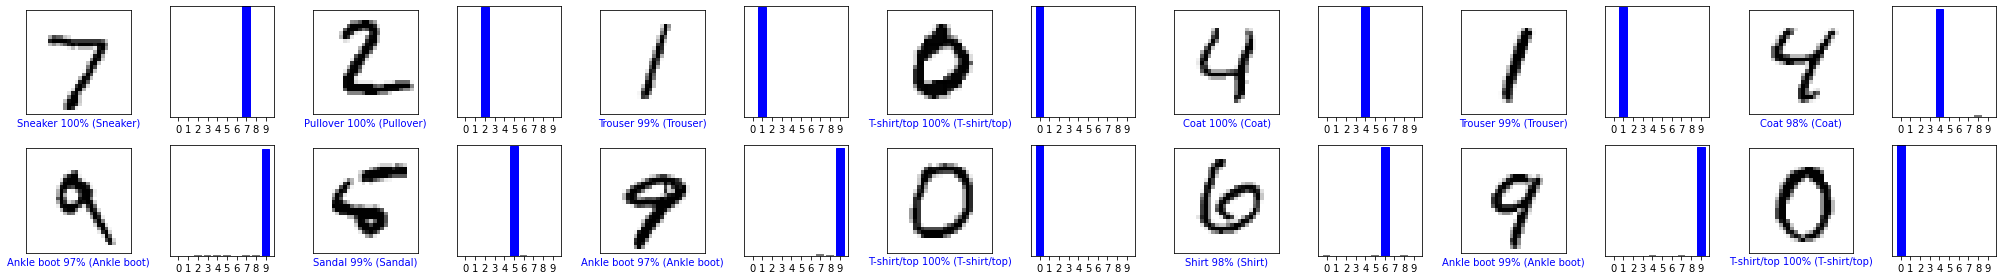

In [ ]:

filas = 2
cols = 7
num_images = filas*cols
plt.figure(figsize=(2*2*cols, 2*filas))
for i in range(num_images):
  plt.subplot(filas, 2*cols, 2*i+1)
  plot_image(i, predicciones1[i], test_labels, test_images1)
  plt.subplot(filas, 2*cols, 2*i+2)
  plot_value_array(i, predicciones1[i], test_labels)
plt.tight_layout()
plt.show()

El modelo 1 tiene una precisión de 96,17%. En este caso entre las 10 primeras imágenes acierta 10 de 10 lo que muestra un resultado bastante fiel al modelo.

##Modelo 2

In [ ]:
def plot_image(i, predicciones2, true_label, img):
  predicciones2, true_label, img = predicciones2, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicciones2)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predicciones2),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predicciones2, true_label):
  predicciones2, true_label = predicciones2, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicciones2, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicciones2)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

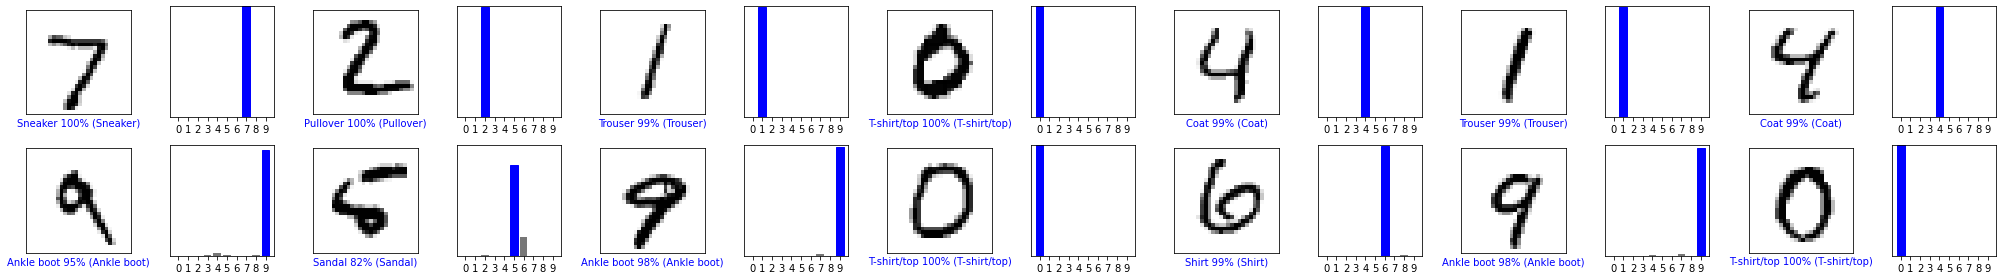

In [ ]:
filas = 2
cols = 7
num_images = filas*cols
plt.figure(figsize=(2*2*cols, 2*filas))
for i in range(num_images):
  plt.subplot(filas, 2*cols, 2*i+1)
  plot_image(i, predicciones2[i], test_labels, test_images1)
  plt.subplot(filas, 2*cols, 2*i+2)
  plot_value_array(i, predicciones2[i], test_labels)
plt.tight_layout()
plt.show()

El modelo 2 tiene una precisión de 96,42%  en este caso acierta las 10 primeras imágenes y con un porcentaje bastante alto por lo que podemos deducir que esta muestra se adecua a la precisión del modelo.

##Modelo 3

In [ ]:
def plot_image(i, predicciones3, true_label, img):
  predicciones3, true_label, img = predicciones3, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicciones3)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predicciones3),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predicciones3, true_label):
  predicciones3, true_label = predicciones3, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicciones3, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicciones3)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

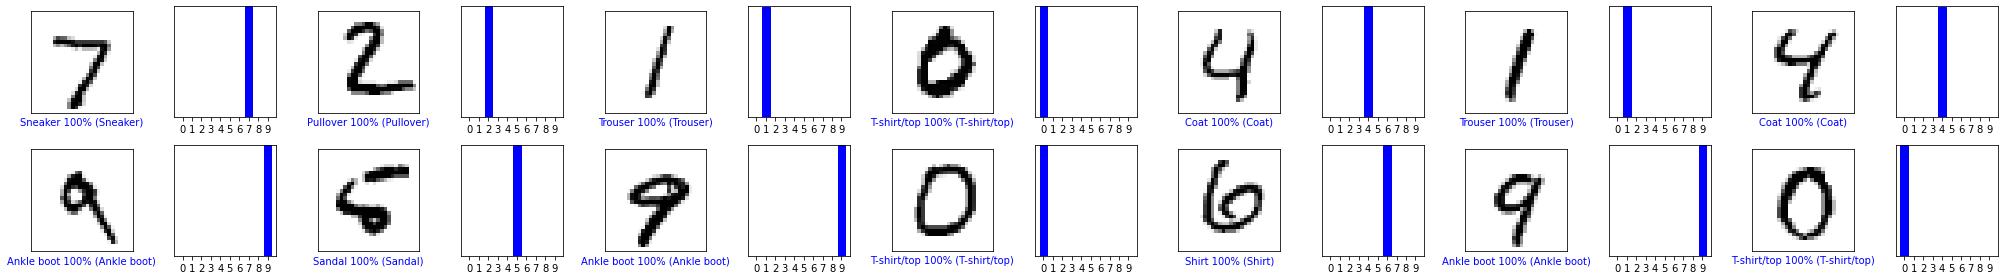

In [ ]:
filas = 2
cols = 7
num_images = filas*cols
plt.figure(figsize=(2*2*cols, 2*filas))
for i in range(num_images):
  plt.subplot(filas, 2*cols, 2*i+1)
  plot_image(i, predicciones3[i], test_labels, test_images1)
  plt.subplot(filas, 2*cols, 2*i+2)
  plot_value_array(i, predicciones3[i], test_labels)
plt.tight_layout()
plt.show()

El modelo 3 tiene una precisión de 99,43% y la gráfica muestra como acierta en 10 de 10 casos lo cual es el resultado que podríamos esperar. 

#Apartado 8


El mejor modelo de la primera práctica era el modelo 6 con el que obteníamos una precisión de test de 87,90 %. Con el mismo set de datos, y la misma tarea de clasificar imágenes de ropa en función de la clase a la que pertenece pero creando un Red Convolucional obtenemos una mayor precisión en el mejor modelo (modelo número # ). Y no solo eso sino que además todos los modelos tienen una precisión superior al 95%, valor que es muy superior a cualquiera de la Red neuronal anterior.
Debido a este hecho, demostramos que la incorporación de capas convolucionales hacen que las Redes Neuronales sean más convenientes a la hora de realizar tareas de reconocimiento de imágenes. 


# Apartado 9

El Dropout funciona de manera contraria al Bach normalization a efectos prácticos. En vez de facilitar la búsqueda de patrones concretos, fuerza a la RNA para que busque patrones mucho más generales, lo que evita el sobreentrenamiento, y consiguiendo una mayor precisión cuando se le meten nuevos datos, como los datos de test. Esto lo consigue bloqueando neuronas de manera aleatoria en cada iteración.

Las RNA funcionan mejor cuando las imágenes estan la misma escala o en escalas muy similares. Bach Normalization se encarga de normalizar los datos antes de usarlos en los entrenamientos para que sean lo más parecidos posibles. Hace lo mismo con las salidas de las funciones. Esto permite que las RNA encuentren patrones de manenera más eficaz. Además, si los datos de entrada son muy dispersos, tras aplicar Bach normalization conseguimos una mayor precisión en las predicciones de la que tendríamos si no la hubieramos aplicado.

#Apartado 10

Los callbacks son recursos de python que nos permiten actuar dentro de las etapas durante el entrenamiento de una red. Se pueden usar de distintas maneras, pero la más importante es el early stopping, que nos sirve para detectar de manera rápida  el momento en el que nuestro modelo deja de aprender. Lo hace de manera rápida y nos ayuda a evitar el overfitting y el underfitting.

# Conclusión

Para una misma tarea, en este caso clasificar imágenes  en función de la clase a la que pertenece, hemos creado muchos modelos diferentes con cambios que alteran el resultado. Estos pequeños cambios como, el número de épocas, función de activación, de pérdida, u el optimizador, hace que unos modelos sean más precisos que otros y que la diferencia entre la accuracy con los datos de pérdida y con los datos de test sea mayor o menor. El mejor modelo es el modelo 3 puesto que tiene una mayor precisión. Además, nos hemos dado cuentas que para la clasificación de imágenes  funcionan mucho mejor las redes convolucionales ya que el error es mucho menor en cualquier modelo de esta segunda práctica que el error cometido en los modelos de la práctica anterior.